Importing libraries

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

Importing the data 

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/DrUzair/MachineLearning/master/Datasets/binary_class_2d.csv')
df.columns = ['X1', 'X2', 'y']
df

,X1,X2,y
0,-0.366340,1.578768,0
1,1.111379,3.185019,0
2,0.329676,2.633543,0
3,1.259236,3.327122,0
4,0.707183,3.091145,0
...,...,...,...
94,7.022479,8.766867,1
95,5.648007,7.634303,1
96,6.656152,10.248755,1
97,5.584119,7.739545,1


Defining the GDA model

In [4]:
class GDA():
  def __init__(self):
    self.pi = None
    self.mu0 = None
    self.mu1 = None
    self.sigma = None
  def train(self, x, y):
    '''
    estimate GDA parameters
    '''
    self.pi = np.mean(y)
    self.mu0 = np.mean(X[y[:]==0], axis=0)
    self.mu1 = np.mean(X[y[:]==1], axis=0)
    
    n_x = x[y[:] == 0] - self.mu0
    p_x = x[y[:] == 1] - self.mu1
    self.sigma = ((n_x.T).dot(n_x) + (p_x.T).dot(p_x))/X.shape[0]
    self.sigma_inv = np.linalg.inv(self.sigma)

  def predict(self, x):
    '''
    returns predictions vector
    '''
    p0 = np.sum(np.dot((x-self.mu0),self.sigma_inv)*(x-self.mu0),axis=1)*self.pi
    p1 = np.sum(np.dot((x-self.mu1),self.sigma_inv)*(x-self.mu1),axis=1)*self.pi
    return p1 >= p0

  def gaussian_density(self, x, mu, sigma):
    """
    Returns Gaussian density for given points
    """
    n = x.shape[1]
    diff = x - mu

    return (1. / (2. * np.pi)**((n+1)/2) / np.sqrt(np.linalg.det(sigma))) *np.exp(-0.5 *np.sum(np.dot((x-mu),self.sigma_inv)*(x-mu),axis=1))

Defining X and y variables

In [5]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

Training the GDA model with the given data

In [6]:
gda = GDA()
gda.train(X, y)

Plotting the GDA model for classifying the given data 

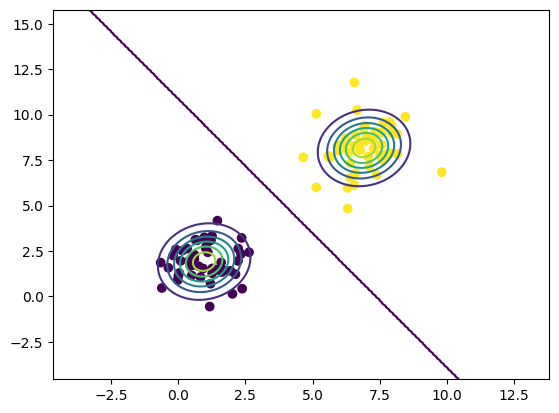

In [7]:
#scatter plotting the data 
plt.scatter(X[:, 0], X[:,1], c=y, cmap='viridis')
x1_vals = np.linspace(X[:, 0].min() - 4, X[:, 0].max() + 4, 400)
x2_vals = np.linspace(X[:, 1].min() - 4, X[:, 1].max() + 4, 400)
xx1, xx2 = np.meshgrid(x1_vals, x2_vals)
grid_points = np.c_[xx1.ravel(), xx2.ravel()]
Z = gda.predict(grid_points)
Z = Z.reshape(xx1.shape)
#plotting the decision boundary 
plt.contour(xx1, xx2, Z)
#plotting contour for class 1
py0 = gda.gaussian_density(grid_points, gda.mu0, gda.sigma)
py0 = py0.reshape(xx1.shape)
contour0 = plt.contour(xx1, xx2, py0)
#plotting contour for class 2
py1 = gda.gaussian_density(grid_points, gda.mu1, gda.sigma)
py1 = py1.reshape(xx2.shape)
contour1 = plt.contour(xx1, xx2, py1)
#plotting the gda graph 
plt.show()